In [2]:
#DIR3122: Computational Fluid Dynamics - Bridget McGibbon
#Step 1: Linear Convection in 1D
#this program uses a simplified version of the Navier-Stokes equation
# to model the transport of a quantity u at a constant speed c over the x dimension.
# the linear convection equation: (du/dt) + c(d(u/dx) = 0 
# if u is velocity, then this is the propogation of a wave

In [3]:
#import libraries
import numpy as np
from matplotlib import pyplot
import time, sys
%matplotlib inline

150
5


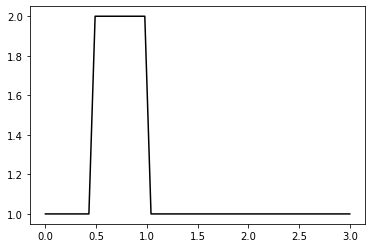

In [4]:
#initialize variables
x = 3 #width of 'grid'
nx = 50 #number of points
dx = x/(nx-1) #distance between points
dt = 0.01 #length of timestep
nt = 150 #number of timesteps
print(nt)

c = 1 #speed of wave (not the speed of light)

#initalize an array for the velocity of the fluid
u = np.ones(nx)

#set up initial conditions: velocity is 2 from 0.5 to 1, and 1 everywhere else
u[int(0.5/dx):int((1/dx)+1)] = 2

#graph initial velocity over the x-dimension. It should be a square wave
xdimension = np.linspace(0,x,nx)
pyplot.plot(xdimension, u, 'k')

v = [1,2,3,4,5]
print(v[-1])

In [9]:
#the finite difference approximation comes from the first term of a taylor series expansion
#use the forward difference approximation for the time derivative: (du/dt) = [u^(n+1)_(i) - u^(n)_(i)] / delta t
#use the backwards difference approximation for the space derivative: (du/dx) = [u^(n)_(i) - u^(n)_(i-1)] / delta x
#(where n is the time index and i is the space index)
#so the linear convection equation becomes:
# (u^(n+1)_(i) - u^(n)_(i))/delta t  +  c((u^(n)_(i) - u^(n)_(i-1))/delta x)  =  0 
#and solving for u^(n+1)_i, we get
# u^(n+1)_i = u^(n)_(i) - c*(delta t/delta x)*(u^(n)_(i) - u^(n)_(i-1))

#initialize an array to hold the results from the previous iteration
u_temp = np.ones(nx)
for n in range (1, nt): #run this loop over n time steps, starting on the 1st timestep after the initial conditions
    u_temp = u.copy()
    for i in range(1, nx): #calculate u at each point in space, using the equation above; 
        u[i] = u_temp[i] - c*(dt/dx)*(u_temp[i]-u_temp[i-1])
    #pyplot.plot(xdimension, u, 'k')  # < uncomment this to graph each iteration of the loop

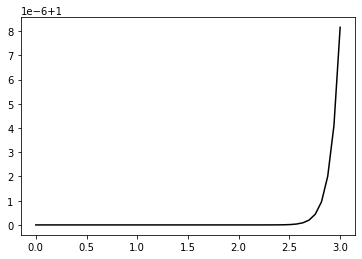

In [10]:
pyplot.plot(xdimension, u, 'k')